<a href="https://colab.research.google.com/github/niruthikka24/Customer-Churn-Dashboard/blob/master/ML_Mini_Project_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn import ensemble

# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
up1 = files.upload()

Saving Test_Dataset_190604N.csv to Test_Dataset_190604N.csv
Saving Train_Dataset_190604N.csv to Train_Dataset_190604N.csv


In [ ]:
df = pd.read_csv('Train_Dataset_190604N.csv')
df.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No


In [ ]:
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
df1 = df.copy(deep=True)
df1["intertiol_plan"] = df1["intertiol_plan"].replace(scale_mapper)
df1["voice_mail_plan"] = df1["voice_mail_plan"].replace(scale_mapper)
df1["Churn"] = df1["Churn"].replace(scale_mapper1)
df1["location_code"] = df1["location_code"].replace(scale_mapper2)
df1.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,2,0,0,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,0
1,1002,105.0,2,0,0,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,0
2,1003,97.0,2,0,1,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,0
3,1004,121.0,1,0,1,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,0
4,1005,98.0,2,0,1,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,0


In [ ]:
df1.describe()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
count,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000,2312.000000
mean,2160.234862,101.327422,1.986592,0.121540,0.257353,7.677336,182.293599,100.771626,30.989252,201.517085,100.230104,17.135212,201.031055,87.633218,9.044827,10.271064,4.451125,2.773702,1.650952,0.248702
std,669.933019,39.923689,0.710490,0.326824,0.437270,13.588330,57.676550,20.467168,9.768751,50.928885,19.827224,4.323711,50.611196,12.730692,2.278361,2.715125,2.450062,0.732984,1.429327,0.432354
min,1001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1579.750000,74.000000,1.000000,0.000000,0.000000,0.000000,144.175000,87.000000,24.495000,165.975000,87.000000,14.190000,167.275000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,2161.500000,101.000000,2.000000,0.000000,0.000000,0.000000,180.450000,102.000000,30.600000,202.500000,101.000000,17.220000,201.000000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,2740.250000,127.000000,2.000000,0.000000,1.000000,14.250000,221.000000,115.000000,37.605000,236.400000,114.000000,20.090000,234.900000,98.000000,10.572500,12.000000,6.000000,3.240000,2.000000,0.000000
max,3321.000000,232.000000,3.000000,1.000000,1.000000,51.000000,350.800000,165.000000,60.960000,358.500000,170.000000,30.830000,395.000000,105.000000,17.770000,18.300000,20.000000,4.940000,9.000000,1.000000


In [ ]:
df2 = df1.copy(deep=True)
df2['total_charge'] = df2['total_day_charge'] + df2['total_eve_charge'] + df2['total_night_charge']
df2['total_calls'] = df2['total_day_calls'] + df2['total_eve_calls'] + df2['total_night_calls']
df2['total_min'] = df2['total_day_min'] + df2['total_eve_min'] + df2['total_night_minutes']
df2.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,1001,15.0,2,0,0,0.0,121.1,130.0,20.59,216.0,...,33.0,10.58,16.1,5.0,4.35,2.0,0,49.53,249.0,572.2
1,1002,105.0,2,0,0,0.0,259.3,96.0,44.08,175.2,...,36.0,10.01,12.0,5.0,3.24,3.0,0,68.98,229.0,656.9
2,1003,97.0,2,0,1,32.0,183.4,94.0,31.18,269.1,...,38.0,9.16,6.7,4.0,1.81,5.0,0,63.21,252.0,656.0
3,1004,121.0,1,0,1,35.0,68.7,95.0,11.68,209.2,...,42.0,8.88,11.4,4.0,3.08,1.0,0,38.34,206.0,475.3
4,1005,98.0,2,0,1,22.0,278.3,89.0,47.31,93.4,...,42.0,4.84,9.7,5.0,2.62,0.0,0,60.09,274.0,479.3


In [ ]:
df2.columns

Index(['customer_id', 'account_length', 'location_code', 'intertiol_plan',
       'voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'Churn', 'total_charge', 'total_calls', 'total_min'],
      dtype='object')

In [ ]:
df2.drop(['total_day_min', 'location_code', 'customer_id',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge'],axis=1,inplace=True)
df2.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,15.0,0,0,0.0,16.1,5.0,4.35,2.0,0,49.53,249.0,572.2
1,105.0,0,0,0.0,12.0,5.0,3.24,3.0,0,68.98,229.0,656.9
2,97.0,0,1,32.0,6.7,4.0,1.81,5.0,0,63.21,252.0,656.0
3,121.0,0,1,35.0,11.4,4.0,3.08,1.0,0,38.34,206.0,475.3
4,98.0,0,1,22.0,9.7,5.0,2.62,0.0,0,60.09,274.0,479.3


In [ ]:
#Create KNN Object.
xgb = XGBClassifier()
#Create x and y variables.
x = df2.drop(columns=['Churn'])
y = df2['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       340
           1       0.97      0.89      0.93       123

    accuracy                           0.96       463
   macro avg       0.97      0.94      0.95       463
weighted avg       0.96      0.96      0.96       463

accuracy: - 0.963, f1 score: - 0.928, roc_score: - 0.939


In [ ]:
#Create KNN Object.
xgb = XGBClassifier()
#Create x and y variables.
x = df2.drop(columns=['Churn'])
y = df2['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       348
           1       0.98      0.86      0.92       115

    accuracy                           0.96       463
   macro avg       0.97      0.93      0.95       463
weighted avg       0.96      0.96      0.96       463

accuracy: - 0.961, f1 score: - 0.917, roc_score: - 0.928


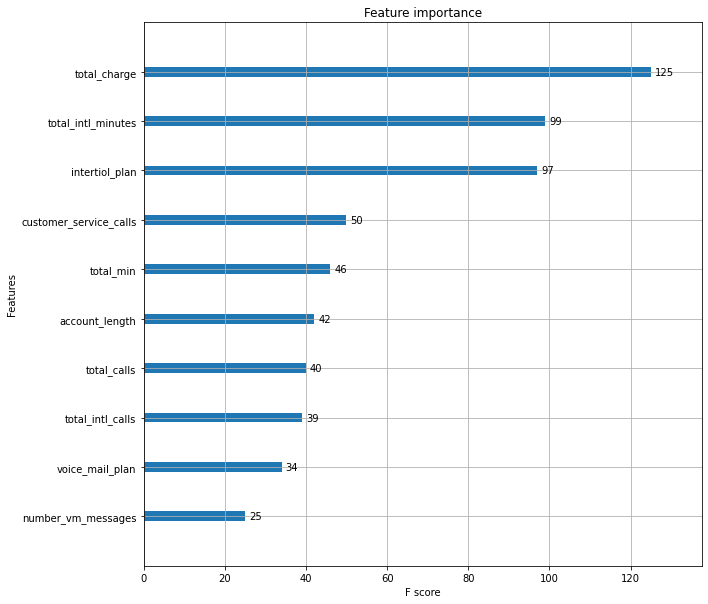

In [ ]:
ax = plot_importance(xgb)
fig = ax.figure
fig.set_size_inches(10,10)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

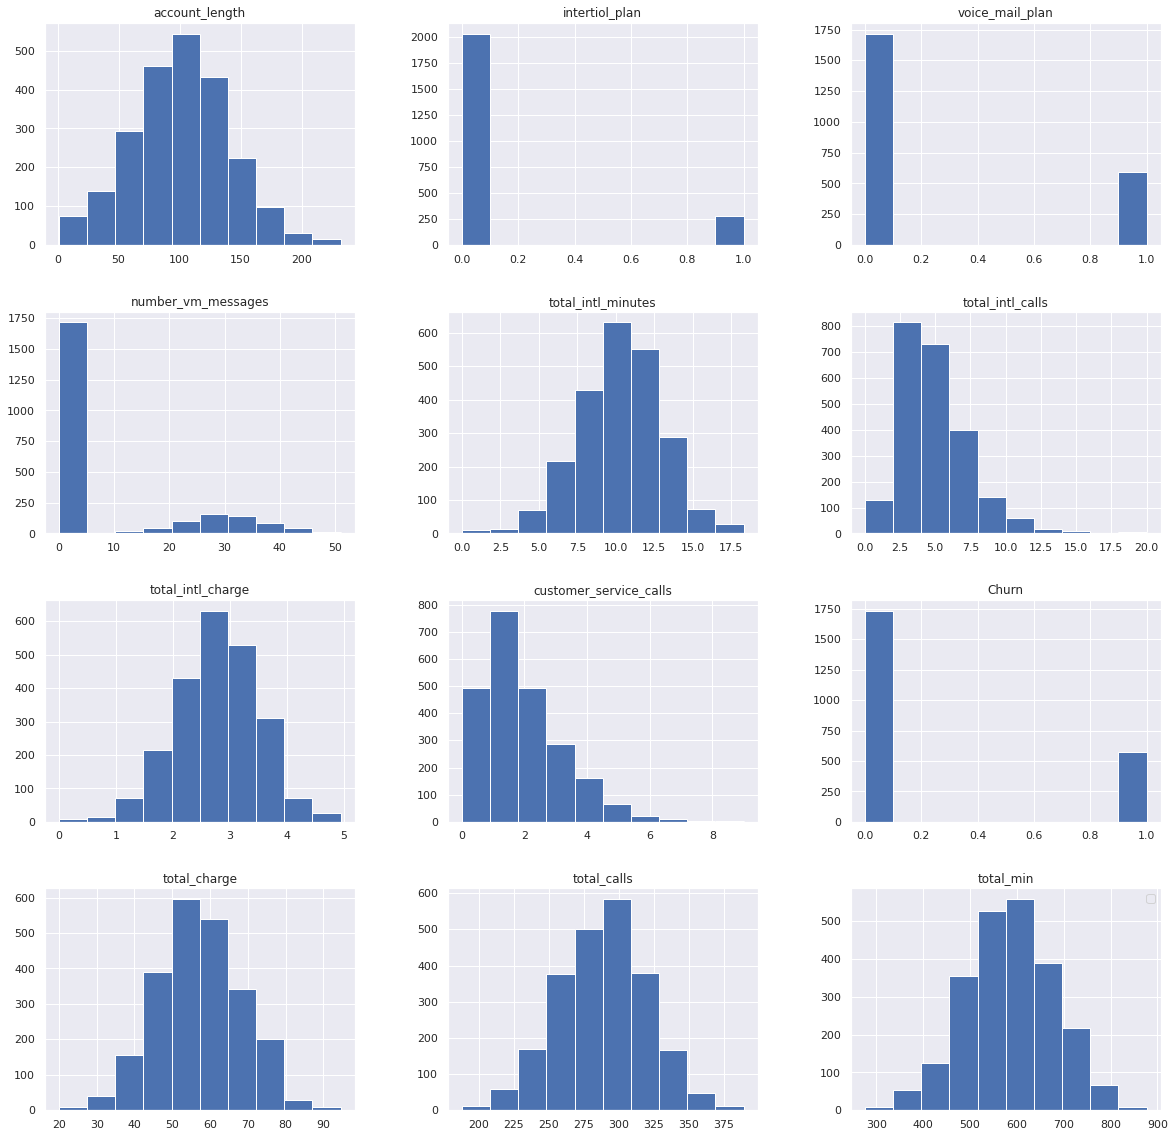

In [ ]:
sns.set()
plt.gcf().clear()
df2.hist(figsize = (20,20))
plt.xlabel('')
plt.legend()

In [ ]:
#using feature importance of the xgboost model
df4 = df2.copy(deep=True)
df4.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,15.0,0,0,0.0,16.1,5.0,4.35,2.0,0,49.53,249.0,572.2
1,105.0,0,0,0.0,12.0,5.0,3.24,3.0,0,68.98,229.0,656.9
2,97.0,0,1,32.0,6.7,4.0,1.81,5.0,0,63.21,252.0,656.0
3,121.0,0,1,35.0,11.4,4.0,3.08,1.0,0,38.34,206.0,475.3
4,98.0,0,1,22.0,9.7,5.0,2.62,0.0,0,60.09,274.0,479.3


In [ ]:
df4.columns

Index(['account_length', 'intertiol_plan', 'voice_mail_plan',
       'number_vm_messages', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'Churn', 'total_charge',
       'total_calls', 'total_min'],
      dtype='object')

In [ ]:
df4.drop(['total_intl_charge','number_vm_messages'],axis=1,inplace=True)
df4.head()

,account_length,intertiol_plan,voice_mail_plan,total_intl_minutes,total_intl_calls,customer_service_calls,Churn,total_charge,total_calls,total_min
0,15.0,0,0,16.1,5.0,2.0,0,49.53,249.0,572.2
1,105.0,0,0,12.0,5.0,3.0,0,68.98,229.0,656.9
2,97.0,0,1,6.7,4.0,5.0,0,63.21,252.0,656.0
3,121.0,0,1,11.4,4.0,1.0,0,38.34,206.0,475.3
4,98.0,0,1,9.7,5.0,0.0,0,60.09,274.0,479.3


In [ ]:
#Create KNN Object.
xgb = XGBClassifier()
#Create x and y variables.
x = df4.drop(columns=['Churn'])
y = df4['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       348
           1       0.98      0.86      0.92       115

    accuracy                           0.96       463
   macro avg       0.97      0.93      0.95       463
weighted avg       0.96      0.96      0.96       463

accuracy: - 0.961, f1 score: - 0.917, roc_score: - 0.928


In [ ]:
df2.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,15.0,0,0,0.0,16.1,5.0,4.35,2.0,0,49.53,249.0,572.2
1,105.0,0,0,0.0,12.0,5.0,3.24,3.0,0,68.98,229.0,656.9
2,97.0,0,1,32.0,6.7,4.0,1.81,5.0,0,63.21,252.0,656.0
3,121.0,0,1,35.0,11.4,4.0,3.08,1.0,0,38.34,206.0,475.3
4,98.0,0,1,22.0,9.7,5.0,2.62,0.0,0,60.09,274.0,479.3


In [ ]:
#Hyper parameter tuning
x = df2.drop(columns=['Churn'])
y = df2['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, stratify=y, test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.927, f1 score: - 0.852, roc_score: - 0.902
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.927, f1 score: - 0.852, roc_score: - 0.902
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.927, f1 score: - 0.852, roc_score: - 0.902
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.955, f1 score: - 0.902, roc_score: - 0.917
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.955, f1 score: - 0.902, roc_score: - 0.917
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.955, f1 score: - 0.902, roc_score: - 0.917
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.959, f1 score: - 0.913, roc_score: - 0.929
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.959, f1 score: - 0.913, roc_score: - 0.929
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.959, f1 score: - 0.913, roc_score: - 0.929
n_est: - 1

In [ ]:
df4.head()

,account_length,intertiol_plan,voice_mail_plan,total_intl_minutes,total_intl_calls,customer_service_calls,Churn,total_charge,total_calls,total_min
0,15.0,0,0,16.1,5.0,2.0,0,49.53,249.0,572.2
1,105.0,0,0,12.0,5.0,3.0,0,68.98,229.0,656.9
2,97.0,0,1,6.7,4.0,5.0,0,63.21,252.0,656.0
3,121.0,0,1,11.4,4.0,1.0,0,38.34,206.0,475.3
4,98.0,0,1,9.7,5.0,0.0,0,60.09,274.0,479.3


In [ ]:
#using SMOTE on xgb without any hyperparameters
X = df4.drop(['Churn'],axis=1)
y = df4['Churn']
k_values = [2, 3, 4, 5, 6, 7]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = XGBClassifier() #leaf_size=1, n_neighbors=23, p=1
    over = SMOTE(sampling_strategy=ratio, k_neighbors=k)
    # under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=2, ratio=0.5, Mean ROC AUC: 0.950
> k=2, ratio=0.6, Mean ROC AUC: 0.950
> k=2, ratio=0.7, Mean ROC AUC: 0.950
> k=2, ratio=0.8, Mean ROC AUC: 0.948
> k=2, ratio=0.9, Mean ROC AUC: 0.949
> k=2, ratio=1.0, Mean ROC AUC: 0.948
> k=3, ratio=0.5, Mean ROC AUC: 0.949
> k=3, ratio=0.6, Mean ROC AUC: 0.949
> k=3, ratio=0.7, Mean ROC AUC: 0.948
> k=3, ratio=0.8, Mean ROC AUC: 0.948
> k=3, ratio=0.9, Mean ROC AUC: 0.947
> k=3, ratio=1.0, Mean ROC AUC: 0.948
> k=4, ratio=0.5, Mean ROC AUC: 0.949
> k=4, ratio=0.6, Mean ROC AUC: 0.949
> k=4, ratio=0.7, Mean ROC AUC: 0.949
> k=4, ratio=0.8, Mean ROC AUC: 0.949
> k=4, ratio=0.9, Mean ROC AUC: 0.949
> k=4, ratio=1.0, Mean ROC AUC: 0.949
> k=5, ratio=0.5, Mean ROC AUC: 0.952
> k=5, ratio=0.6, Mean ROC AUC: 0.949
> k=5, ratio=0.7, Mean ROC AUC: 0.950
> k=5, ratio=0.8, Mean ROC AUC: 0.947
> k=5, ratio=0.9, Mean ROC AUC: 0.948
> k=5, ratio=1.0, Mean ROC AUC: 0.947
> k=6, ratio=0.5, Mean ROC AUC: 0.952
> k=6, ratio=0.6, Mean ROC AUC: 0.951
> k=6, ratio

In [ ]:
df4.shape

(2312, 10)

In [ ]:
X = df4.drop(columns=['Churn'])
y = df4['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=5)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=3)
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       355
           1       0.97      0.84      0.90       166

    accuracy                           0.94       521
   macro avg       0.95      0.92      0.93       521
weighted avg       0.94      0.94      0.94       521

accuracy: - 0.942, f1 score: - 0.903, roc_score: - 0.916


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)

testx = testdf.copy(deep=True)
testx['total_charge'] = testx['total_day_charge'] + testx['total_eve_charge'] + testx['total_night_charge']
testx['total_calls'] = testx['total_day_calls'] + testx['total_eve_calls'] + testx['total_night_calls']
testx['total_min'] = testx['total_day_min'] + testx['total_eve_min'] + testx['total_night_minutes']

testx.drop(['total_day_min', 'location_code', 'customer_id',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge','total_intl_charge','number_vm_messages'],axis=1,inplace=True)
predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred22.csv', index=False)
files.download('pred22.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x = df4.drop(columns=['Churn'])#,'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'
y = df4['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=5)
x_over, y_over = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [25,50,100,150,200,250]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 25, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.916, f1 score: - 0.810, roc_score: - 0.844
n_est: - 25, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.916, f1 score: - 0.810, roc_score: - 0.844
n_est: - 25, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.916, f1 score: - 0.810, roc_score: - 0.844
n_est: - 25, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.946, f1 score: - 0.885, roc_score: - 0.900
n_est: - 25, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.946, f1 score: - 0.885, roc_score: - 0.900
n_est: - 25, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.946, f1 score: - 0.885, roc_score: - 0.900
n_est: - 25, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.946, f1 score: - 0.885, roc_score: - 0.900
n_est: - 25, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.946, f1 score: - 0.885, roc_score: - 0.900
n_est: - 25, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.946, f1 score: - 0.885, roc_score: - 0.900
n

In [ ]:
#n_est: - 25, gamma: - 9, max_depth: - 5, eta: - 0.01, accuracy: - 0.948,
X = df4.drop(columns=['Churn'])
y = df4['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=5)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=3)
xgb = XGBClassifier(n_estimators=25,gamma=9,max_depth=5,eta=0.01,objective='binary:logistic')
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       355
           1       0.99      0.84      0.91       166

    accuracy                           0.95       521
   macro avg       0.96      0.92      0.94       521
weighted avg       0.95      0.95      0.95       521

accuracy: - 0.946, f1 score: - 0.909, roc_score: - 0.919


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)

testx = testdf.copy(deep=True)
testx['total_charge'] = testx['total_day_charge'] + testx['total_eve_charge'] + testx['total_night_charge']
testx['total_calls'] = testx['total_day_calls'] + testx['total_eve_calls'] + testx['total_night_calls']
testx['total_min'] = testx['total_day_min'] + testx['total_eve_min'] + testx['total_night_minutes']

testx.drop(['total_day_min', 'location_code', 'customer_id',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge','total_intl_charge','number_vm_messages'],axis=1,inplace=True)
predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred23.csv', index=False)
files.download('pred23.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Trying scale_pos_weight
#finding minority majority ratio
df4['Churn'].value_counts()

0    1737
1     575
Name: Churn, dtype: int64

In [ ]:
#ratio min:maj is 1:3
#therefore, set scale_pos_weight = 3

xgb = XGBClassifier(scale_pos_weight = 3)
#Create x and y variables.
x = df4.drop(columns=['Churn'])
y = df4['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       348
           1       0.89      0.87      0.88       115

    accuracy                           0.94       463
   macro avg       0.93      0.92      0.92       463
weighted avg       0.94      0.94      0.94       463

accuracy: - 0.942, f1 score: - 0.881, roc_score: - 0.918


In [ ]:
df2.head()

,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,total_charge,total_calls,total_min
0,15.0,0,0,0.0,16.1,5.0,4.35,2.0,0,49.53,249.0,572.2
1,105.0,0,0,0.0,12.0,5.0,3.24,3.0,0,68.98,229.0,656.9
2,97.0,0,1,32.0,6.7,4.0,1.81,5.0,0,63.21,252.0,656.0
3,121.0,0,1,35.0,11.4,4.0,3.08,1.0,0,38.34,206.0,475.3
4,98.0,0,1,22.0,9.7,5.0,2.62,0.0,0,60.09,274.0,479.3


In [ ]:
xgb = XGBClassifier(scale_pos_weight = 3)
#Create x and y variables.
x = df2.drop(columns=['Churn'])
y = df2['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       348
           1       0.91      0.88      0.89       115

    accuracy                           0.95       463
   macro avg       0.94      0.92      0.93       463
weighted avg       0.95      0.95      0.95       463

accuracy: - 0.948, f1 score: - 0.894, roc_score: - 0.925


In [ ]:
for val in [3,4,5,6]:
  xgb = XGBClassifier(scale_pos_weight = val)
  #Create x and y variables.
  x = df2.drop(columns=['Churn'])
  y = df2['Churn']
  #Split data into training and testing.
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)
  #Training the model.
  xgb.fit(x_train, y_train)
  #Predict test data set.
  y_pred = xgb.predict(x_test)
  #Checking performance our model with classification report.
  # print(classification_report(y_test, y_pred))
  #Checking performance our model with ROC Score.
  print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

accuracy: - 0.948, f1 score: - 0.894, roc_score: - 0.925
accuracy: - 0.942, f1 score: - 0.882, roc_score: - 0.920
accuracy: - 0.937, f1 score: - 0.876, roc_score: - 0.920
accuracy: - 0.933, f1 score: - 0.869, roc_score: - 0.921


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)

testx = testdf.copy(deep=True)
testx['total_charge'] = testx['total_day_charge'] + testx['total_eve_charge'] + testx['total_night_charge']
testx['total_calls'] = testx['total_day_calls'] + testx['total_eve_calls'] + testx['total_night_calls']
testx['total_min'] = testx['total_day_min'] + testx['total_eve_min'] + testx['total_night_minutes']

testx.drop(['total_day_min', 'location_code', 'customer_id',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge'],axis=1,inplace=True)
predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred24.csv', index=False)
files.download('pred24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df5 = df1.copy(deep=True)
df5.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','customer_id'],axis=1,inplace=True)
df5.head()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_eve_min,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,Churn
0,15.0,2,0,0,0.0,121.1,130.0,216.0,86.0,235.1,33.0,16.1,5.0,2.0,0
1,105.0,2,0,0,0.0,259.3,96.0,175.2,97.0,222.4,36.0,12.0,5.0,3.0,0
2,97.0,2,0,1,32.0,183.4,94.0,269.1,120.0,203.5,38.0,6.7,4.0,5.0,0
3,121.0,1,0,1,35.0,68.7,95.0,209.2,69.0,197.4,42.0,11.4,4.0,1.0,0
4,98.0,2,0,1,22.0,278.3,89.0,93.4,143.0,107.6,42.0,9.7,5.0,0.0,0


In [ ]:
for val in [3,4,5,6]:
  xgb = XGBClassifier(scale_pos_weight = val)
  #Create x and y variables.
  x = df5.drop(columns=['Churn'])
  y = df5['Churn']
  #Split data into training and testing.
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)
  #Training the model.
  xgb.fit(x_train, y_train)
  #Predict test data set.
  y_pred = xgb.predict(x_test)
  #Checking performance our model with classification report.
  # print(classification_report(y_test, y_pred))
  #Checking performance our model with ROC Score.
  print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

accuracy: - 0.933, f1 score: - 0.867, roc_score: - 0.915
accuracy: - 0.911, f1 score: - 0.831, roc_score: - 0.900
accuracy: - 0.907, f1 score: - 0.827, roc_score: - 0.903
accuracy: - 0.892, f1 score: - 0.803, roc_score: - 0.890


In [ ]:
xgb = XGBClassifier(scale_pos_weight = 3)
#Create x and y variables.
x = df5.drop(columns=['Churn'])
y = df5['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       348
           1       0.86      0.88      0.87       115

    accuracy                           0.93       463
   macro avg       0.91      0.91      0.91       463
weighted avg       0.93      0.93      0.93       463

accuracy: - 0.933, f1 score: - 0.867, roc_score: - 0.915


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)

testx = testdf.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','customer_id'],axis=1)
predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred25.csv', index=False)
files.download('pred25.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df6 = df.copy(deep=True)
df6.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)

testx = testdf.copy(deep=True)
testx['total_charge'] = testx['total_day_charge'] + testx['total_eve_charge'] + testx['total_night_charge']
testx['total_calls'] = testx['total_day_calls'] + testx['total_eve_calls'] + testx['total_night_calls']
testx['total_min'] = testx['total_day_min'] + testx['total_eve_min'] + testx['total_night_minutes']

testx.drop(['total_day_min', 'location_code', 'customer_id',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge'],axis=1,inplace=True)
predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred21.csv', index=False)
files.download('pred21.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df3 = df.copy(deep=True)
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df3['location_code'], prefix='location_')
# Drop column B as it is now encoded
df3 = df3.drop('location_code',axis = 1)
# Join the encoded df3
df3 = df3.join(one_hot)
df3.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,location__445,location__452,location__547
0,1001,15.0,no,no,0.0,121.1,130.0,20.59,216.0,86.0,...,33.0,10.58,16.1,5.0,4.35,2.0,No,0,1,0
1,1002,105.0,no,no,0.0,259.3,96.0,44.08,175.2,97.0,...,36.0,10.01,12.0,5.0,3.24,3.0,No,0,1,0
2,1003,97.0,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,...,38.0,9.16,6.7,4.0,1.81,5.0,No,0,1,0
3,1004,121.0,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,...,42.0,8.88,11.4,4.0,3.08,1.0,No,1,0,0
4,1005,98.0,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,...,42.0,4.84,9.7,5.0,2.62,0.0,No,0,1,0


In [ ]:
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
df3["intertiol_plan"] = df3["intertiol_plan"].replace(scale_mapper)
df3["voice_mail_plan"] = df3["voice_mail_plan"].replace(scale_mapper)
df3["Churn"] = df3["Churn"].replace(scale_mapper1)
df3.head()

,customer_id,account_length,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,location__445,location__452,location__547
0,1001,15.0,0,0,0.0,121.1,130.0,20.59,216.0,86.0,...,33.0,10.58,16.1,5.0,4.35,2.0,0,0,1,0
1,1002,105.0,0,0,0.0,259.3,96.0,44.08,175.2,97.0,...,36.0,10.01,12.0,5.0,3.24,3.0,0,0,1,0
2,1003,97.0,0,1,32.0,183.4,94.0,31.18,269.1,120.0,...,38.0,9.16,6.7,4.0,1.81,5.0,0,0,1,0
3,1004,121.0,0,1,35.0,68.7,95.0,11.68,209.2,69.0,...,42.0,8.88,11.4,4.0,3.08,1.0,0,1,0,0
4,1005,98.0,0,1,22.0,278.3,89.0,47.31,93.4,143.0,...,42.0,4.84,9.7,5.0,2.62,0.0,0,0,1,0


In [ ]:
df3['Churn'].value_counts()

0    1737
1     575
Name: Churn, dtype: int64

In [ ]:
#Create KNN Object.
xgb = XGBClassifier()
#Create x and y variables.
x = df1.drop(columns=['Churn'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       340
           1       0.94      0.82      0.87       123

    accuracy                           0.94       463
   macro avg       0.94      0.90      0.92       463
weighted avg       0.94      0.94      0.94       463

accuracy: - 0.937, f1 score: - 0.874, roc_score: - 0.900


In [ ]:
xgb = XGBClassifier()
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       340
           1       0.93      0.81      0.87       123

    accuracy                           0.94       463
   macro avg       0.93      0.90      0.91       463
weighted avg       0.94      0.94      0.93       463

accuracy: - 0.935, f1 score: - 0.870, roc_score: - 0.896


In [ ]:
xgb = XGBClassifier()
#Create x and y variables.
x = df3.drop(columns=['Churn','customer_id'])
y = df3['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       340
           1       0.93      0.81      0.87       123

    accuracy                           0.94       463
   macro avg       0.93      0.90      0.91       463
weighted avg       0.94      0.94      0.93       463

accuracy: - 0.935, f1 score: - 0.870, roc_score: - 0.896


In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27),
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       344
           1       0.97      0.82      0.89       119

    accuracy                           0.95       463
   macro avg       0.96      0.91      0.93       463
weighted avg       0.95      0.95      0.95       463

accuracy: - 0.948, f1 score: - 0.891, roc_score: - 0.907


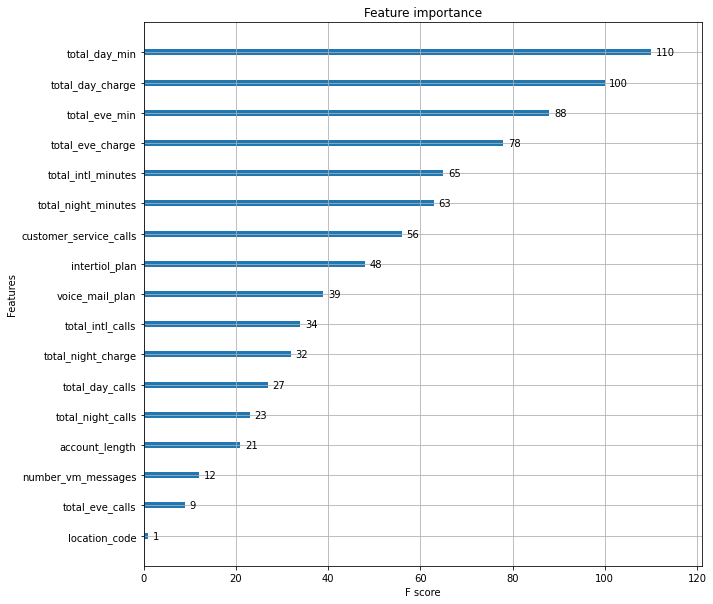

In [ ]:
ax = plot_importance(xgb)
fig = ax.figure
fig.set_size_inches(10,10)

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df3.drop(columns=['Churn','customer_id'])
y = df3['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       344
           1       0.96      0.82      0.89       119

    accuracy                           0.95       463
   macro avg       0.95      0.91      0.93       463
weighted avg       0.95      0.95      0.94       463

accuracy: - 0.946, f1 score: - 0.887, roc_score: - 0.906


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id'],axis=1)
predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred7.csv', index=False)
files.download('pred7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id','total_day_min','total_eve_min','total_night_minutes','total_intl_minutes','voice_mail_plan'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       344
           1       0.97      0.80      0.88       119

    accuracy                           0.94       463
   macro avg       0.95      0.89      0.92       463
weighted avg       0.94      0.94      0.94       463

accuracy: - 0.942, f1 score: - 0.876, roc_score: - 0.895


In [ ]:
x = df1.drop(columns=['Churn','customer_id','total_day_min','total_eve_min','total_night_minutes','total_intl_minutes','voice_mail_plan'])
y = df1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.860, f1 score: - 0.709, roc_score: - 0.796
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.860, f1 score: - 0.709, roc_score: - 0.796
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.860, f1 score: - 0.709, roc_score: - 0.796
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.903, f1 score: - 0.798, roc_score: - 0.852
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.903, f1 score: - 0.798, roc_score: - 0.852
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.903, f1 score: - 0.798, roc_score: - 0.852
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.916, f1 score: - 0.824, roc_score: - 0.866
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.916, f1 score: - 0.824, roc_score: - 0.866
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.916, f1 score: - 0.824, roc_score: - 0.866
n_est: - 1

In [ ]:
xgb = XGBClassifier(n_estimators=50,gamma=3,max_depth=10,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id','total_day_min','total_eve_min','total_night_minutes','total_intl_minutes','voice_mail_plan'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       344
           1       0.97      0.81      0.88       119

    accuracy                           0.94       463
   macro avg       0.95      0.90      0.92       463
weighted avg       0.95      0.94      0.94       463

accuracy: - 0.944, f1 score: - 0.881, roc_score: - 0.899


In [ ]:
x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1

In [ ]:
xgb = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
#Create x and y variables.
x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
#Split data into training and testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#Training the model.
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       344
           1       0.96      0.83      0.89       119

    accuracy                           0.95       463
   macro avg       0.95      0.91      0.93       463
weighted avg       0.95      0.95      0.95       463

accuracy: - 0.948, f1 score: - 0.892, roc_score: - 0.910


In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'],axis=1)

x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
xgb = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
xgb.fit(x, y)

predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred9.csv', index=False)
files.download('pred9.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Trying Oversampling

In [ ]:
X = df1.drop(['Churn'],axis=1)
y = df1['Churn']

In [ ]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	# under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('model', model)] #second one in list - ('under', under),
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.972
> k=2, Mean ROC AUC: 0.973
> k=3, Mean ROC AUC: 0.972
> k=4, Mean ROC AUC: 0.973
> k=5, Mean ROC AUC: 0.972
> k=6, Mean ROC AUC: 0.972
> k=7, Mean ROC AUC: 0.972


In [ ]:
df2 = df1.copy(deep=True)
X = df2.drop(['Churn','customer_id'],axis=1)
y = df2['Churn']
# fit and apply the transform
print(y.value_counts())
oversample = SMOTE(sampling_strategy=1, k_neighbors=k)
X_over, y_over = oversample.fit_resample(X, y)
print(y_over.value_counts())

0    1737
1     575
Name: Churn, dtype: int64
0    1737
1    1737
Name: Churn, dtype: int64


In [ ]:
X = df1.drop(['Churn','customer_id'],axis=1)
y = df1['Churn']
k_values = [1, 2, 3, 4, 5, 6, 7]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = XGBClassifier() #leaf_size=1, n_neighbors=23, p=1
    over = SMOTE(sampling_strategy=ratio, k_neighbors=k)
    # under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=1, ratio=0.5, Mean ROC AUC: 0.944
> k=1, ratio=0.6, Mean ROC AUC: 0.943
> k=1, ratio=0.7, Mean ROC AUC: 0.942
> k=1, ratio=0.8, Mean ROC AUC: 0.940
> k=1, ratio=0.9, Mean ROC AUC: 0.940
> k=1, ratio=1.0, Mean ROC AUC: 0.939
> k=2, ratio=0.5, Mean ROC AUC: 0.944
> k=2, ratio=0.6, Mean ROC AUC: 0.943
> k=2, ratio=0.7, Mean ROC AUC: 0.941
> k=2, ratio=0.8, Mean ROC AUC: 0.938
> k=2, ratio=0.9, Mean ROC AUC: 0.939
> k=2, ratio=1.0, Mean ROC AUC: 0.939
> k=3, ratio=0.5, Mean ROC AUC: 0.942
> k=3, ratio=0.6, Mean ROC AUC: 0.942
> k=3, ratio=0.7, Mean ROC AUC: 0.940
> k=3, ratio=0.8, Mean ROC AUC: 0.939
> k=3, ratio=0.9, Mean ROC AUC: 0.939
> k=3, ratio=1.0, Mean ROC AUC: 0.937
> k=4, ratio=0.5, Mean ROC AUC: 0.944
> k=4, ratio=0.6, Mean ROC AUC: 0.943
> k=4, ratio=0.7, Mean ROC AUC: 0.940
> k=4, ratio=0.8, Mean ROC AUC: 0.940
> k=4, ratio=0.9, Mean ROC AUC: 0.940
> k=4, ratio=1.0, Mean ROC AUC: 0.940
> k=5, ratio=0.5, Mean ROC AUC: 0.942
> k=5, ratio=0.6, Mean ROC AUC: 0.941
> k=5, ratio

In [ ]:
X = df1.drop(columns=['Churn','customer_id'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.2, random_state=4)
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
#Predict test data set.
y_pred = xgb.predict(x_test)
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))
#Checking performance our model with ROC Score.
print("accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f" %(acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       332
           1       0.95      0.83      0.88       189

    accuracy                           0.92       521
   macro avg       0.93      0.90      0.91       521
weighted avg       0.92      0.92      0.92       521

accuracy: - 0.921, f1 score: - 0.884, roc_score: - 0.901


In [ ]:
x = df1.drop(columns=['Churn','customer_id'])#,'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.857, f1 score: - 0.697, roc_score: - 0.786
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.830, roc_score: - 0.873
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.918, f1 score: - 0.827, roc_score: - 0.868
n_est: - 1

In [ ]:
x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])#
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.901, f1 score: - 0.787, roc_score: - 0.840
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.905, f1 score: - 0.788, roc_score: - 0.834
n_est: - 1

In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf.drop(['customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'],axis=1)

x = df1.drop(columns=['Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages'])
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
x_over, y_over = oversample.fit_resample(x, y)
xgb = XGBClassifier(n_estimators=100,gamma=1,max_depth=7,eta=0.1,objective='binary:logistic')
xgb.fit(x_over, y_over)

predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred10.csv', index=False)
files.download('pred10.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = df1[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]
y = df1['Churn']
k_values = [1, 2, 3, 4, 5, 6, 7]
ratios = [0.5,0.6,0.7,0.8,0.9,1]
for k in k_values:
  for ratio in ratios:
    # define pipeline
    model = XGBClassifier() #leaf_size=1, n_neighbors=23, p=1
    over = SMOTE(sampling_strategy=ratio, k_neighbors=k)
    # under = RandomUnderSampler(sampling_strategy=ratio)
    steps = [('over', over), ('model', model)] #second one in list - ('under', under),
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, ratio=%.1f, Mean ROC AUC: %.3f' % (k, ratio, score))

> k=1, ratio=0.5, Mean ROC AUC: 0.932
> k=1, ratio=0.6, Mean ROC AUC: 0.931
> k=1, ratio=0.7, Mean ROC AUC: 0.929
> k=1, ratio=0.8, Mean ROC AUC: 0.929
> k=1, ratio=0.9, Mean ROC AUC: 0.926
> k=1, ratio=1.0, Mean ROC AUC: 0.928
> k=2, ratio=0.5, Mean ROC AUC: 0.932
> k=2, ratio=0.6, Mean ROC AUC: 0.929
> k=2, ratio=0.7, Mean ROC AUC: 0.928
> k=2, ratio=0.8, Mean ROC AUC: 0.927
> k=2, ratio=0.9, Mean ROC AUC: 0.927
> k=2, ratio=1.0, Mean ROC AUC: 0.925
> k=3, ratio=0.5, Mean ROC AUC: 0.932
> k=3, ratio=0.6, Mean ROC AUC: 0.930
> k=3, ratio=0.7, Mean ROC AUC: 0.927
> k=3, ratio=0.8, Mean ROC AUC: 0.926
> k=3, ratio=0.9, Mean ROC AUC: 0.926
> k=3, ratio=1.0, Mean ROC AUC: 0.922
> k=4, ratio=0.5, Mean ROC AUC: 0.931
> k=4, ratio=0.6, Mean ROC AUC: 0.930
> k=4, ratio=0.7, Mean ROC AUC: 0.929
> k=4, ratio=0.8, Mean ROC AUC: 0.927
> k=4, ratio=0.9, Mean ROC AUC: 0.925
> k=4, ratio=1.0, Mean ROC AUC: 0.924
> k=5, ratio=0.5, Mean ROC AUC: 0.931
> k=5, ratio=0.6, Mean ROC AUC: 0.929
> k=5, ratio

In [ ]:
x = df1[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=6)
x_over, y_over = oversample.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2)
for val in [1,5,10,15,20,25,30,50,75,100]:
  for l in [1,3,5,7,9]:
    for m in [3,5,7,10]:
      for e in [0.01, 0.1, 0.2]:
        model = XGBClassifier(n_estimators=val,gamma=l,max_depth=m,eta=e,objective='binary:logistic')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print("n_est: - %d, gamma: - %d, max_depth: - %d, eta: - %.2f, accuracy: - %.3f, f1 score: - %.3f, roc_score: - %.3f"
              %(val,l,m,e,acc(y_test,y_pred),f1(y_test,y_pred),roc_auc_score(y_test, y_pred)))

n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.01, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.10, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 3, eta: - 0.20, accuracy: - 0.853, f1 score: - 0.688, roc_score: - 0.780
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.01, accuracy: - 0.870, f1 score: - 0.712, roc_score: - 0.789
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.10, accuracy: - 0.870, f1 score: - 0.712, roc_score: - 0.789
n_est: - 1, gamma: - 1, max_depth: - 5, eta: - 0.20, accuracy: - 0.870, f1 score: - 0.712, roc_score: - 0.789
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.01, accuracy: - 0.881, f1 score: - 0.734, roc_score: - 0.802
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.10, accuracy: - 0.881, f1 score: - 0.734, roc_score: - 0.802
n_est: - 1, gamma: - 1, max_depth: - 7, eta: - 0.20, accuracy: - 0.881, f1 score: - 0.734, roc_score: - 0.802
n_est: - 1

In [ ]:
testdf = pd.read_csv('Test_Dataset_190604N.csv')
testdf.head()
scale_mapper = {"yes":1, "no":0}
scale_mapper1 = {"Yes":1, "No":0}
scale_mapper2 = {445:1, 452:2, 547:3}
testdf["intertiol_plan"] = testdf["intertiol_plan"].replace(scale_mapper)
testdf["voice_mail_plan"] = testdf["voice_mail_plan"].replace(scale_mapper)
testdf["location_code"] = testdf["location_code"].replace(scale_mapper2)
testx = testdf[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]

x = df1[['total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan']]
y = df1['Churn']
oversample = SMOTE(sampling_strategy=0.5, k_neighbors=6)
x_over, y_over = oversample.fit_resample(x, y)
xgb = XGBClassifier(n_estimators=75,gamma=1,max_depth=10,eta=0.1,objective='binary:logistic')
xgb.fit(x_over, y_over)

predtest = xgb.predict(testx)
testdf['Churn'] = predtest
scale_mapper = {1:'Yes', 0:'No'}
testdf["Churn"] = testdf["Churn"].replace(scale_mapper)
testdf.drop(['account_length','location_code','intertiol_plan','voice_mail_plan', 'number_vm_messages', 'total_day_min',
       'total_day_calls', 'total_day_charge', 'total_eve_min',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',],axis=1,inplace=True)
testdf.to_csv('pred11.csv', index=False)
files.download('pred11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

pred 7 -> hypertuned xgb - 0.90666

pred 8 -> hypertuned xgb, 'Churn','customer_id','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','number_vm_messages' removed - 0.90333

pred 9 -> hypertuned xgb, same features as above removed, but trained model on entire train (not just 80%) before predicting test - 0.90666

pred 10 -> hypertuned xgb,  SMOTE(sampling_strategy=0.5, k_neighbors=2) applied, same features as above removed - 0.90777

pred11 -> hypertuned xgb, 'total_day_min','total_eve_min','total_intl_minutes','total_night_minutes','customer_service_calls','intertiol_plan','voice_mail_plan' were the only features selected based on xgboost feature importance plot, SMOTE(sampling_strategy=0.5, k_neighbors=6) was applied - 0.87888

# New features

aggregated day, evening and night details as total_min, total_charge and total_calls, then removed the 9 columns corresponding to day, evening and night details
1. pred21 -> xgboost with no hyper parameter tuning -> 0.92333

2. pred22 -> looked at the feature importance of xgboost and eliminated 2 more cols: total_intl_charge and number_vm_messages. Then applied upsampling also with ratio 0.5 and k=5 -> 0.92666 (BEST so far)

3. pred23 -> did hyperparameter tuning (n_estimators=25,gamma=9,max_depth=5,eta=0.01,objective='binary:logistic') for the case in pred22, but score reduced -> 0.92000

4. tried scale_pos_weight for xgboost, but got only low scores -> 0.90888

